# Decision Tree Clasification in Pyhton

- Easy to interpret both by practitioners and domain experts. Are *white box models*.
- Can explain exactly why a specific prediction was made.
- Require very little data preparation.
    - They not require feature scaling or centering at all.

Trees: 
- The representation of a Classification Decision Tree is a binary tree.
- Each node can have zero, one or two child nodes.
- A node represents a single input variable, assuming the variable is numeric.
- The leaf nodes of the tree contain an output variable (y), which is used to make a prediction.
- The split with the best cost (lowest cost) is selected.

#### Regression:

   > The cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle.
    
#### Classification:

   > The Gini cost function is used, which provides an indication of how pure the nodes are.





## Decision Tree Algorithm from Scratch

In [35]:
# Loading the data:
# we are going to use iris dataset
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:, 2:], columns = iris.feature_names[2:]) # We only will use two features for simplicity
y = iris.target
# And the dataset with X and y to work with it along the excersice
dataset = X.copy()
target_names = dict(zip([0, 1, 2], iris.target_names))
dataset['Species'] = [target_names[i]   for i in y]
dataset.head()

,petal length (cm),petal width (cm),Species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


### Gini index

- The gini index is our cost function, we going to use it to evaluate the splits in the dataset.

- A split in the dataset involves one input attribute and one value for that attribute. It can be used to divide training patterns into two groups of rows.

- Node purity refers to how mixed the training data assigned to each node is. A node is pure (`gini = 0`) if all training instances it applies to belong to the same class.

- Gini impurity is calculated as follows:
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2,$$

> where $p_{i,k}^2$ is the ratio of class $k$ instances among the trining instances in the $i^{th}$ node.

In [36]:
# Let's start defining or gini_index function
def gini_index(groups, classes):
   # Count all samples at split point
    n_instances = (sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [68]:
def split_dataset(attribute, value, dataset):
    # Determines if the value is a string or a number
    if isinstance(value, str):
        left_ = np.where(dataset[attribute] == value)
        right_ = np.where(dataset[attribute] != value)
    if isinstance(value, (int, float)):
        left_ = np.where(dataset[attribute] <= value)
        right_ = np.where(dataset[attribute] > value)
    return (left_[0], right_[0])

In [69]:
def parse_split(left, right, dataset):
    dataset_left = dataset.iloc[left]
    dataset_right = dataset.iloc[right]
    return dataset_left, dataset_right

In [71]:
# Example of split
print('Dataset variables:', list(dataset.columns[:2]))
print('Dataset shape:',dataset.shape)
# let's split the dataset
variable_ = 'petal length (cm)'
value_ = 2.45
l_1, r_1 = split_dataset(attribute=variable_, value = value_, dataset= dataset)
df_left, df_right = parse_split(l_1, r_1, dataset)
print(F'Num. of observations with "{variable_}" <= {value_}: {len(left)}')
print(F'Num. of observations with "{variable_}" > {value_}: {len(right)}')

Dataset variables: ['petal length (cm)', 'petal width (cm)']
Dataset shape: (150, 3)
Num. of observations with "petal length (cm)" <= 2.45: 50
Num. of observations with "petal length (cm)" > 2.45: 100


In [82]:
df_left['Species'].value_counts()

setosa    50
Name: Species, dtype: int64

In [84]:
df_right['Species'].value_counts()

virginica     50
versicolor    50
Name: Species, dtype: int64

In [85]:
def gini_index(splits, target_column, classes = target_names.values()):
    splits = [split[target_column] for split in splits]
    num_samples = sum([len(split) for split in splits])
    score = 0
    for split in splits:
        size = len(split)
        if size == 0:
            continue
        for class_name in classes:
            p = [obsv for obsv in split].count(class_name) / num_samples
            score += (p**2)
    gini = 1 - score
    return gini

In [86]:
gini_index((df_left, df_right), 'Species')

0.6666666666666667

In [93]:
# Next Node:
variable_ = 'petal width (cm)'
value_ = 1.75
l_2, r_2 = split_dataset(attribute=variable_, value = value_, dataset= df_right)
df_left_2, df_right_2 = parse_split(l_2, r_2, df_right)
print(F'Num. of observations with "{variable_}" <= {value_}: {len(left_2)}')
print(F'Num. of observations with "{variable_}" > {value_}: {len(right_2)}')

Num. of observations with "petal width (cm)" <= 1.75: 54
Num. of observations with "petal width (cm)" > 1.75: 46


In [94]:
df_left_2['Species'].value_counts()

versicolor    49
virginica      5
Name: Species, dtype: int64

## Getting the best split

# Using Sklearn

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_cfl = DecisionTreeClassifier(max_depth=2)
tree_cfl.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

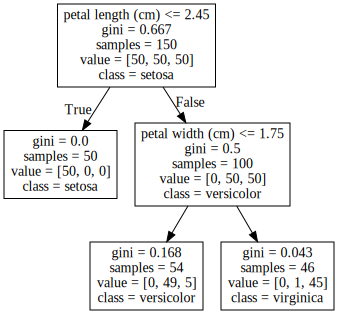

In [47]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(tree_cfl, out_file=None, 
    feature_names = iris.feature_names[2:], 
    class_names= iris.target_names))

display(SVG(graph.pipe(format='svg')))

In [0]:
b